# matplotlib 入門 (9) nitta@tsuda.ac.jp

# 9章: 棒グラフ

## 9-1: 棒グラフの描画 pyplot.bar

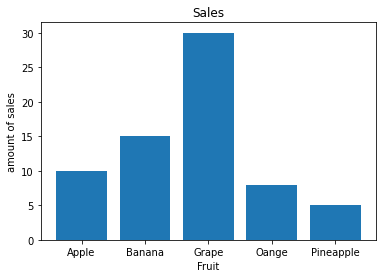

In [ ]:
# sample code 9-1
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-2: 棒グラフで bar の間の隙間を無くす

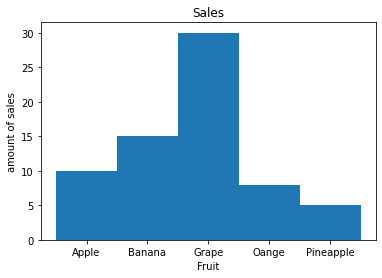

In [ ]:
# sample code 9-2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels, width=1.0)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-3: barの色、枠線の幅と色を個別に設定する

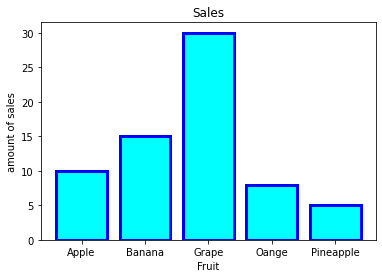

In [ ]:
# sample code 9-3
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels, color='cyan', edgecolor='blue', linewidth=3)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-4: エラー・バーを表示する


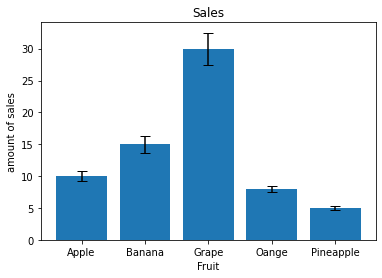

In [ ]:
# sample code 9-4
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']
errs = [0.8, 1.3, 2.5, 0.5, 0.3]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels, yerr=errs, ecolor='black', capsize=5)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-5: 水平の棒グラフにエラー・バーを表示する (Axes.barh)

<code><font color="blue">
barh(y, width, height=0.8, left=None, ...)
</font></code> ... 水平方向の棒グラフを表示する

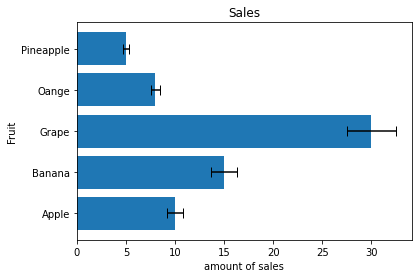

In [ ]:
# sample code 9-5
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']
errs = [0.8, 1.3, 2.5, 0.5, 0.3]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.barh(
    y=xs, 
    width=ys, 
    xerr=errs, 
    ecolor='black', 
    capsize=5
)
ax.set_yticks(xs)
ax.set_yticklabels(labels)

ax.set_title('Sales')
ax.set_ylabel('Fruit')
ax.set_xlabel('amount of sales')

plt.show()

## 9-6: 2軸の棒グラフの先端にエラーバーと軸の値を表示する (Axes.bar)
Axes.bar を使うと、2軸の棒グラフを作成できる。 バーの先端に値を示すラベルテキストを配置する。

<code><font color="blue">matplotlib.axes.Axes.bar(x,height,width,bottom,*,align='center',**kwargs)</font></code>
...
バーの幅を設定する width は、軸間の幅を1とする割合で指定する(default 0.8)。

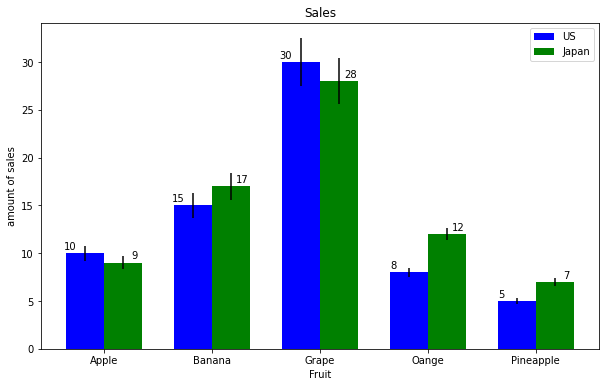

In [ ]:
from re import X
# sample code 9-6
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = np.array([1,2,3,4,5])
ys = [10, 15, 30, 8, 5]
ys2 = [9, 17, 28, 12, 7]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']
errs = [0.8, 1.3, 2.5, 0.5, 0.3]
errs2 = [0.7, 1.4, 2.4, 0.6, 0.4]

bar_w = 0.35   # bar の幅

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# left bar
rects1 = ax.bar(
    xs - bar_w,     # bar の左端を bar_w だけずらす
    height=ys,
    width=bar_w,  # bar の幅 
    align='edge',     # bar の左端を基準に配置 
    yerr=errs, 
    color='blue',
    ecolor='black', 
    label = 'US'
)
# right bar
rects2 = ax.bar(
    x=xs,             # bar の左端は本来の位置
    height=ys2,
    width=bar_w,  # bar の幅 
    align='edge',     # bar の左端を基準に配置 
    yerr=errs2, 
    color='green',
    ecolor='black', 
    label = 'Japan'
)

ax.set_title('Sales')
ax.legend()
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')
ax.set_xticks(xs)
ax.set_xticklabels(labels)

def draw_height_on_rects(rects, scale):
    '''
    Draw text on the bar top.
    Parameters:
        rects: Rectangle object
        xpos: 'left', 'center', 'right'
    '''
    for rect in rects:
        bar_h = rect.get_height()  # height of bar
        tx = rect.get_x() + rect.get_width() * scale
        ty = bar_h + 0.2
        ax.text(
            tx,
            ty,
            f'{bar_h:.0f}',
            ha='center',
            va='bottom'
        )

draw_height_on_rects(rects1, 0.1)
draw_height_on_rects(rects2, 0.8)

plt.show()

## 9-7: エラーバーの上側と下側の表示の切り替える (errorbar)
<pre>
    Axes.errorbar(x,y,
                  yerr=None,   # error bar のy方向のサイズ
                  xerr=None,   # error bar のx方向のサイズ
                  fmt='',      # markerの形状 'none'/'o'/'^'/'<'
                  ecolor=None,
                  elinewidth=None,
                  lolims=False,
                  uplims=False,
                  xlolims=False,
                  xuplims=False,
                  **kwargs)
</pre>

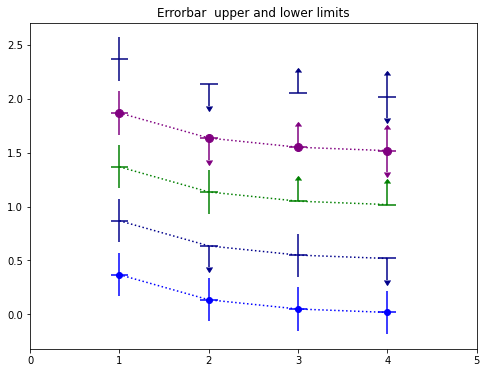

In [ ]:
# sample code 9-7
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(1, 5)
ys = np.exp(-xs)

# error barの長さ
xerr = 0.1
yerr = 0.2

# error の上部と下部の表示／非表示
uplims = np.array([0, 1, 0, 1], dtype=bool)
lolims = np.array([0, 0, 1, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(1, 1, figsize=(8,6))

# standard error bar
ax.errorbar(
    xs,
    ys,
    xerr=xerr,  # x方向のサイズ
    yerr=yerr,  # y方向のサイズ
    fmt='o',    # markerの形状
    linestyle='dotted',
    color='blue'
    )

# error bar 上部の表示／非表示
ax.errorbar(
    xs,
    ys + 0.5,
    xerr=xerr,  # x方向のサイズ
    yerr=yerr,  # y方向のサイズ
    uplims=uplims,  # 上部の表示／非表示
    linestyle='dotted',
    color='darkblue'
)

# error bar 下部の表示／非表示
ax.errorbar(
    xs,
    ys + 1,
    xerr=xerr,  # x方向のサイズ
    yerr=yerr,  # y方向のサイズ
    lolims=lolims,  # 下部の表示／非表示
    linestyle='dotted',
    color='green'
)

# error bar 上部と下部の表示／非表示
ax.errorbar(
    xs,
    ys+1.5,
    xerr=xerr,  # x方向のサイズ
    yerr=yerr,  # y方向のサイズ
    uplims=uplims,  # 上部の表示／非表示
    lolims=lolims,  # 下部の表示／非表示
    fmt='o',    # markerの形状
    markersize=8,
    linestyle='dotted',
    color='purple'
)

# error bar 上部と下部の表示／非表示
# markerを非表示にするとラインも非表示になる
ax.errorbar(
    xs,
    ys + 2,
    xerr=xerr,  # x方向のサイズ
    yerr=yerr,  # y方向のサイズ
    uplims=uplims,  # 上部の表示／非表示
    lolims=lolims,  # 下部の表示／非表示
    fmt='none',    # markerの形状
    markersize=8,
    linestyle='dotted',
    color='navy'
)

# x軸の範囲とグラフタイトルを設定
ax.set_xlim((0, 5))
ax.set_title('Errorbar  upper and lower limits')

plt.show()